In [1]:
# Import necessary libraries

from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
from selenium import webdriver

In [2]:
phone_list = [] # create an empty list
driver = webdriver.Firefox()
driver.get('https://www.skroutz.gr/c/40/kinhta-thlefwna/f/852219/Smartphones.html?o=smartphone&page=') # the link we want to scrape

def scrape(url, page, stop): # define a scraping function
    
    
    while page != None:
        html = driver.page_source
        soup = bs(html, "lxml")
        cards = soup.findAll('li', {'class': 'cf card with-skus-slider'})
    
        for phone in cards:
            phone = {
                'product_name': phone.div.h2.a.text,
                'price': (phone.findAll('div', {'class': 'price react-component reviewable'})[0].div.a.text.replace(",", ".")),
                'specs': phone.findAll('p', {'class': 'specs'})[0].text.replace(",", " "),
                'rating': float(phone.findAll('a', {'class': 'rating stars'})[0].span.text),
                'stores' :phone.findAll('span', {'class': 'shop-count'})[0].text,
                'reviews' :phone.findAll('div', {'class': 'reviews-count'})[0].text
            }
            phone_list.append(phone)
        
        if page == stop:
            break
        page = page + 1
    


In [7]:
scrape('https://www.skroutz.gr/c/40/kinhta-thlefwna/f/852219/Smartphones.html?page={page}', 1,34) # Scrape webpages

In [8]:
df = pd.DataFrame.from_dict(phone_list) # Create a pandas dataframe from our dictionary

In [9]:
df.shape # Check the number of observations we scrapped

(1892, 6)

In [6]:
df.head() # let's check our dataset

,product_name,price,specs,rating,stores,reviews
0,Samsung Galaxy A52s 5G Dual SIM (6GB/128GB) Aw...,από336.95 €,"Μοντέλο: 2021 Οθόνη: Super AMOLED 6.5"" Μπατ...",4.4,σε 36 καταστήματα,505
1,Apple iPhone 11 (4GB/64GB) Black,από528.74 €,"Μοντέλο: 2019 Οθόνη: Retina IPS 6.1"" Μπαταρ...",4.6,σε 40 καταστήματα,769
2,Xiaomi Redmi Note 11 Dual SIM (4GB/128GB) Grap...,από194.55 €,"Μοντέλο: 2022 Οθόνη: AMOLED 6.43"" Μπαταρία:...",4.5,σε 25 καταστήματα,129
3,Realme 8i Dual SIM (4GB/128GB) Space Black,από183.80 €,"Μοντέλο: 2021 Οθόνη: IPS 6.6"" Μπαταρία: 500...",4.6,σε 22 καταστήματα,180
4,Apple iPhone 13 5G (4GB/128GB) Midnight,από889.00 €,Μοντέλο: 2021 Οθόνη: Super Retina XDR OLED 6...,4.7,σε 22 καταστήματα,125


In [10]:
pd.set_option('display.max_colwidth', None) # Display all characters of strings
df.head()

,product_name,price,specs,rating,stores,reviews
0,Samsung Galaxy A52s 5G Dual SIM (6GB/128GB) Awesome Black,από336.95 €,"Μοντέλο: 2021 Οθόνη: Super AMOLED 6.5"" Μπαταρία: 4500mAh",4.4,σε 36 καταστήματα,505
1,Apple iPhone 11 (4GB/64GB) Black,από528.74 €,"Μοντέλο: 2019 Οθόνη: Retina IPS 6.1"" Μπαταρία: 3110mAh",4.6,σε 40 καταστήματα,769
2,Xiaomi Redmi Note 11 Dual SIM (4GB/128GB) Graphite Gray,από194.55 €,"Μοντέλο: 2022 Οθόνη: AMOLED 6.43"" Μπαταρία: 5000mAh",4.5,σε 25 καταστήματα,129
3,Realme 8i Dual SIM (4GB/128GB) Space Black,από183.80 €,"Μοντέλο: 2021 Οθόνη: IPS 6.6"" Μπαταρία: 5000mAh",4.6,σε 22 καταστήματα,180
4,Apple iPhone 13 5G (4GB/128GB) Midnight,από889.00 €,"Μοντέλο: 2021 Οθόνη: Super Retina XDR OLED 6.1"" Μπαταρία: 3240mAh",4.7,σε 22 καταστήματα,125


In [11]:
import re # Import re for writing regular expressions and clean the dataset from greek characters

df['ram'] = df['product_name'].str.extract(r'(\(.*/)')
df['rom'] = df['product_name'].str.extract(r'(/.*\))')
df['name'] = df["product_name"].str.extract(r'([a-zA-Z].*\()')
df['stores'] = df["stores"].str.extract(r'(\d\d)')
df['price'] = df['price'].str.extract(r'(\d.*\d)')
df['year'] = df["specs"].str.extract(r'(:.*\d)')
df['screen'] = df["specs"].str.extract(r'(η:.*")')
df['inches'] = df['screen'].str.extract(r'(\d.*\d)')
df['screen'] = df['screen'].str.replace((r'(\d.*\d)'), "")


C:\Users\Soukantos\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()


In [12]:
df.screen = df['screen'].str.replace("η|:", "") # Clean screen column

df["screen"] = df["screen"].str.replace(r'( ")', "")


C:\Users\Soukantos\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
C:\Users\Soukantos\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
df["ram"] = df["ram"].str.extract(r'(\d)') # Clean ram column 


In [14]:
df['rom'] = df['rom'].str.extract(r'(\d.*\d)') # clean rom column 

In [15]:
df['name'] = df['name'].str.replace(r'(\()', "") # clean name column

C:\Users\Soukantos\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [16]:
# Clean year column
    
df['year'] = df['year'].str.extract(r'(\d.*η)') # Clean year column
df['year'] = df['year'].str.extract(r'(\d.*\d)')

# Clean price column
df["price"] = df['price'].str.replace(".", "") # remove separator
pd.to_numeric(df["price"]) # tranfrom to numeric and then to float
df['price'] = df['price'].astype(float)
df['price'] = df['price'].div(100) # divide the prices with 100 to get the original price

In [17]:
# Clean battery column

df['battery'] = df['specs'].str.extract(r'(α.*h)') # Clean battery column
df['battery'] = df['battery'].str.replace("αταρία:", "")
df['battery'] = df['battery'].str.replace("mAh", "")



In [18]:
# Drop columns that we do not need

df.drop(["specs"], axis = 1, inplace = True)
df.drop(["product_name"], axis = 1, inplace = True)

In [19]:
# Reorder the columns

df = df[["name", "price", "rating", 'reviews', "stores", "year", "ram", "rom", "screen", "inches", "battery" ]] 

In [20]:
# Check columns types

df.dtypes 

name        object
price       object
rating     float64
reviews     object
stores      object
year        object
ram         object
rom         object
screen      object
inches      object
battery     object
dtype: object

In [22]:
# Create a brand column 

df['brand'] = df['name'].apply(lambda x: x.split(' ')[0])

In [23]:
# Format data types

df['ram'] = df['ram'].astype(int)
pd.to_numeric(df["rom"])
df['inches'] = df['inches'].astype(float)
df['battery'] = df['battery'].fillna(0)
df['battery'] = df['battery'].astype(int)
df['rom'] = df['rom'].astype(int)

In [24]:
# Turn brand and screen columns into lowercase

df['brand'] = df['brand'].str.lower()
df['screen'] = df['screen'].str.lower()

In [25]:
# Import other useful libraries

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [26]:
df.head()

,name,price,rating,reviews,stores,year,ram,rom,screen,inches,battery,brand
0,Samsung Galaxy A52s 5G Dual SIM,336.95,4.4,505,36,2021,6,128,super amoled,6.50,4500,samsung
1,Apple iPhone 11,528.74,4.6,769,40,2019,4,64,retina ips,6.10,3110,apple
2,Xiaomi Redmi Note 11 Dual SIM,194.55,4.5,129,25,2022,4,128,amoled,6.43,5000,xiaomi
3,Realme 8i Dual SIM,183.80,4.6,180,22,2021,4,128,ips,6.60,5000,realme
4,Apple iPhone 13 5G,889.00,4.7,125,22,2021,4,128,super retina xdr oled,6.10,3240,apple


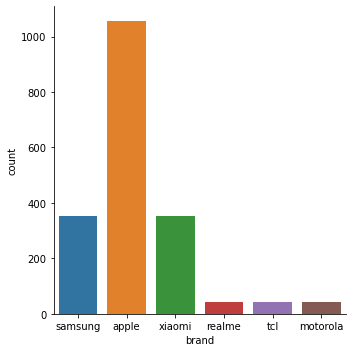

In [27]:
# Our dataset is now clean. We created the necessary columns and we are ready for analysis. 
# For example we could start with some simple graphs or simple descriptice statistics
# Which brands have the larger amount of models in the market?

sns.catplot(x = 'brand', kind = 'count', data = df)



In [35]:
## We can group our dataset by different columns
phones = df.groupby('brand')
phones.first()

,name,price,rating,reviews,stores,year,ram,rom,screen,inches,battery
brand,,,,,,,,,,,
apple,Apple iPhone 11,528.74,4.6,769,40,2019,4,64,retina ips,6.10,3110
motorola,Motorola Moto G60 Dual SIM,218.01,4.9,7,18,2021,6,128,ips,6.80,6000
realme,Realme 8i Dual SIM,183.80,4.6,180,22,2021,4,128,ips,6.60,5000
samsung,Samsung Galaxy A52s 5G Dual SIM,336.95,4.4,505,36,2021,6,128,super amoled,6.50,4500
tcl,TCL 306 Dual SIM,117.35,4.8,20,22,2022,3,32,,6.52,5000
xiaomi,Xiaomi Redmi Note 11 Dual SIM,194.55,4.5,129,25,2022,4,128,amoled,6.43,5000


In [30]:
## Group our dataset by a specific brand 

phones.get_group('xiaomi')

,name,price,rating,reviews,stores,year,ram,rom,screen,inches,battery,brand
2,Xiaomi Redmi Note 11 Dual SIM,194.55,4.5,129,25,2022,4,128,amoled,6.43,5000,xiaomi
7,Xiaomi Redmi 10C NFC Dual SIM,140.40,4.4,29,43,2022,4,64,ips,6.71,5000,xiaomi
9,Xiaomi Redmi Note 11 Dual SIM,169.02,4.5,129,13,2022,4,64,amoled,6.43,5000,xiaomi
10,Xiaomi Redmi Note 11 NFC Dual SIM,179.07,4.4,98,35,2022,4,128,amoled,6.43,5000,xiaomi
14,Xiaomi Redmi Note 10 Pro NFC Dual SIM,220.17,4.0,432,37,2021,6,128,amoled,6.67,5020,xiaomi
...,...,...,...,...,...,...,...,...,...,...,...,...
1859,Xiaomi Redmi Note 11 NFC Dual SIM,179.07,4.4,98,35,2022,4,128,amoled,6.43,5000,xiaomi
1863,Xiaomi Redmi Note 10 Pro NFC Dual SIM,220.17,4.0,432,37,2021,6,128,amoled,6.67,5020,xiaomi
1873,Xiaomi Redmi Note 11 NFC Dual SIM,168.60,4.4,98,34,2022,4,64,amoled,6.43,5000,xiaomi
1874,Xiaomi Redmi 10C NFC Dual SIM,141.47,4.4,29,43,2022,4,64,ips,6.71,5000,xiaomi


In [ ]:
## Now that our dataset is ready we can explore the data and give answers to our questions